In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# First Order ODEs
Düştüğündeki hava sürtünmesi
$$ \frac{dv}{dt} - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$
ilk önce bu formda yazmalıyız
$$\frac{dv}{dt} = f(t,v)$$
Yani hem hıza hemde zamana bağlı bir fonksiyon var elimizde diyebiliriz.
$$\frac{dv}{dt} = \alpha v^2 - \beta$$

In [3]:
def dvdt(t,v):
    return 3*v**2-5
v0=0

In [13]:
t=np.linspace(0,1,100)
sol_m1=odeint(dvdt,y0=v0,t=t,tfirst=True)
#tfirst ilk önce fonkda aldığı parametreyi t olarak almasını sagladı.
#odeint birazdaha klasik bir çözüm sunar.
sol_m2=solve_ivp(dvdt,t_span=(0,max(t)),y0=[v0],t_eval=t)
#tspan hareketin ne kadar sürüceğini belirtiyor.
#solveivp birazdaha özelleştirme imkanı sunar.

In [12]:
sol_m1.T#matrisin transposunu almış olduk.Numpyın içinde.
#Bu çıkan matris 2 boyutlu olucagı ıcın çizdirmek istersen 0. elemanını al.

array([[ 0.        , -0.05050401, -0.10100185, -0.15148732, -0.20195424,
        -0.25239642, -0.30280768, -0.35318185, -0.40351273, -0.45379413,
        -0.50401989, -0.55418381, -0.60427971, -0.6543014 , -0.70424271,
        -0.75409744, -0.80385942, -0.85352246, -0.90308038, -0.952527  ,
        -1.00185612, -1.05106157, -1.10013717, -1.14907672, -1.19787405,
        -1.24652297, -1.2950173 , -1.34335086, -1.39151745, -1.43951091,
        -1.48732503, -1.53495365, -1.58239058, -1.62962962, -1.67666461,
        -1.72348935, -1.77009766, -1.81648337, -1.86264027, -1.9085622 ,
        -1.95424296, -1.99967638, -2.04485627, -2.08977644, -2.13443072,
        -2.17881292, -2.22291685, -2.26673633, -2.31026518, -2.35349721,
        -2.39642625, -2.4390461 , -2.48135059, -2.52333352, -2.56498872,
        -2.60631001, -2.64729119, -2.68792609, -2.72820851, -2.76813229,
        -2.80769123, -2.84687915, -2.88568987, -2.9241172 , -2.96215496,
        -2.99979696, -3.03703703, -3.07386898, -3.1

In [16]:
sol_m2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-02 ...  9.899e-01  1.000e+00]
        y: [[ 0.000e+00 -5.050e-02 ... -3.979e+00 -4.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0

In [46]:
sol_m2.y[0]#Bunun sayesinde var olan çözümleri görmüş olucaz.
#Bu çıkan matris 2 boyutlu olucagı ıcın çizdirmek istersen 0. elemanını al.

array([ 0.        , -0.05050402, -0.10100186, -0.15148733, -0.20195424,
       -0.25239643, -0.30280769, -0.35318185, -0.40351273, -0.45379414,
       -0.50401989, -0.55418381, -0.60427971, -0.65430141, -0.70424271,
       -0.75409745, -0.80385943, -0.85352247, -0.90308039, -0.952527  ,
       -1.00185613, -1.05106158, -1.10013717, -1.14907673, -1.19787406,
       -1.24652298, -1.29501731, -1.34335086, -1.39151746, -1.43951091,
       -1.48732504, -1.53495366, -1.58239058, -1.62962963, -1.67666462,
       -1.72348936, -1.77009767, -1.81648337, -1.86264028, -1.90856221,
       -1.95424297, -1.99967639, -2.04485628, -2.08977645, -2.13443073,
       -2.17881292, -2.22291685, -2.26673634, -2.31026519, -2.35349722,
       -2.39642626, -2.43904611, -2.48135059, -2.52333353, -2.56498873,
       -2.60631001, -2.6472912 , -2.68792609, -2.72820852, -2.7681323 ,
       -2.80769124, -2.84687916, -2.88568987, -2.92411721, -2.96215496,
       -2.99979697, -3.03703704, -3.07386898, -3.11028662, -3.14

In [47]:
v_sol_m1=sol_m1.T[0]
v_sol_m2=sol_m2.y[0]

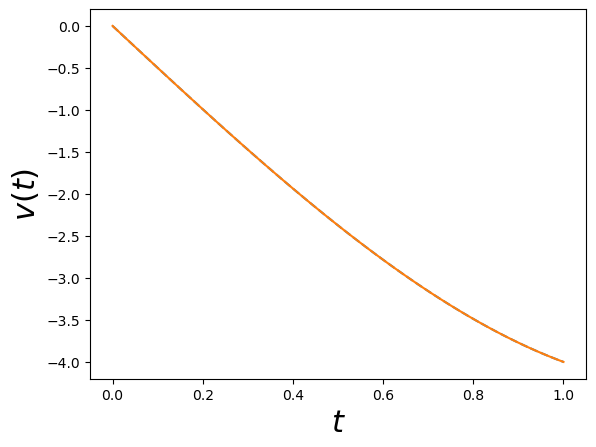

In [48]:
plt.plot(t,v_sol_m1,"--")
plt.plot(t,v_sol_m2)
plt.xlabel("$t$",fontsize=22)
plt.ylabel("$v(t)$",fontsize=22)
plt.show()

# Coupled first order ODEs

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$. This is like before, but in vector format

$$ \vec{S} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} \hspace{10mm} \implies  \hspace{10mm} \frac{d\vec{S}}{dx} = \vec{f}(x, \vec{S}) = \vec{f}(x, y_1, y_2) =  \begin{bmatrix} y_1' \\ y_2' \end{bmatrix}  = \begin{bmatrix}  y_1 + y_2^2 + 3x\\ 3y_1 + y_2^3 - \cos(x) \end{bmatrix}$$

In [73]:
def dSdx(x, S):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = [y1_0, y2_0]

In [74]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

In [83]:
sol#ilki y1 ikinci y2

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [96]:
sol.T

array([[ 0.00000000e+00,  1.53914061e-04,  6.19093356e-04,
         1.40076628e-03,  2.50418953e-03,  3.93464633e-03,
         5.69744401e-03,  7.79789517e-03,  1.02413187e-02,
         1.30330245e-02,  1.61783065e-02,  1.96824391e-02,
         2.35506573e-02,  2.77881638e-02,  3.24001125e-02,
         3.73915921e-02,  4.27676179e-02,  4.85331404e-02,
         5.46930282e-02,  6.12520553e-02,  6.82148995e-02,
         7.55861308e-02,  8.33702071e-02,  9.15714669e-02,
         1.00194121e-01,  1.09242251e-01,  1.18719801e-01,
         1.28630571e-01,  1.38978219e-01,  1.49766252e-01,
         1.60998020e-01,  1.72676732e-01,  1.84805434e-01,
         1.97387014e-01,  2.10424222e-01,  2.23919648e-01,
         2.37875730e-01,  2.52294784e-01,  2.67178978e-01,
         2.82530347e-01,  2.98350829e-01,  3.14642248e-01,
         3.31406342e-01,  3.48644774e-01,  3.66359140e-01,
         3.84551013e-01,  4.03221942e-01,  4.22373488e-01,
         4.42007253e-01,  4.62124894e-01,  4.82728181e-0

In [98]:
sol.T[0]#y1 çözümleri

array([0.00000000e+00, 1.53914061e-04, 6.19093356e-04, 1.40076628e-03,
       2.50418953e-03, 3.93464633e-03, 5.69744401e-03, 7.79789517e-03,
       1.02413187e-02, 1.30330245e-02, 1.61783065e-02, 1.96824391e-02,
       2.35506573e-02, 2.77881638e-02, 3.24001125e-02, 3.73915921e-02,
       4.27676179e-02, 4.85331404e-02, 5.46930282e-02, 6.12520553e-02,
       6.82148995e-02, 7.55861308e-02, 8.33702071e-02, 9.15714669e-02,
       1.00194121e-01, 1.09242251e-01, 1.18719801e-01, 1.28630571e-01,
       1.38978219e-01, 1.49766252e-01, 1.60998020e-01, 1.72676732e-01,
       1.84805434e-01, 1.97387014e-01, 2.10424222e-01, 2.23919648e-01,
       2.37875730e-01, 2.52294784e-01, 2.67178978e-01, 2.82530347e-01,
       2.98350829e-01, 3.14642248e-01, 3.31406342e-01, 3.48644774e-01,
       3.66359140e-01, 3.84551013e-01, 4.03221942e-01, 4.22373488e-01,
       4.42007253e-01, 4.62124894e-01, 4.82728181e-01, 5.03819005e-01,
       5.25399429e-01, 5.47471735e-01, 5.70038442e-01, 5.93102385e-01,
      

In [100]:
sol.T[1]#y2 çözümleri

array([ 0.        , -0.01009927, -0.0201882 , -0.03025632, -0.04029308,
       -0.05028784, -0.06022984, -0.07010824, -0.07991207, -0.08963025,
       -0.09925158, -0.10876475, -0.1181583 , -0.12742067, -0.13654013,
       -0.14550483, -0.15430276, -0.16292176, -0.17134949, -0.17957349,
       -0.18758109, -0.19535947, -0.2028956 , -0.21017629, -0.21718816,
       -0.22391762, -0.23035091, -0.23647404, -0.24227286, -0.24773298,
       -0.25283984, -0.25757866, -0.26193448, -0.26589214, -0.2694363 ,
       -0.27255142, -0.27522179, -0.27743156, -0.27916469, -0.28040501,
       -0.28113622, -0.2813419 , -0.28100554, -0.28011053, -0.27864019,
       -0.2765778 , -0.27390662, -0.27060987, -0.26667082, -0.26207275,
       -0.25679897, -0.25083288, -0.24415797, -0.2367578 , -0.22861607,
       -0.21971655, -0.21004318, -0.19957999, -0.18831112, -0.17622082,
       -0.16329341, -0.14951323, -0.13486464, -0.11933195, -0.10289936,
       -0.08555086, -0.06727014, -0.04804052, -0.02784475, -0.00

In [101]:
y1_sol=sol.T[0]
y2_sol=sol.T[1]

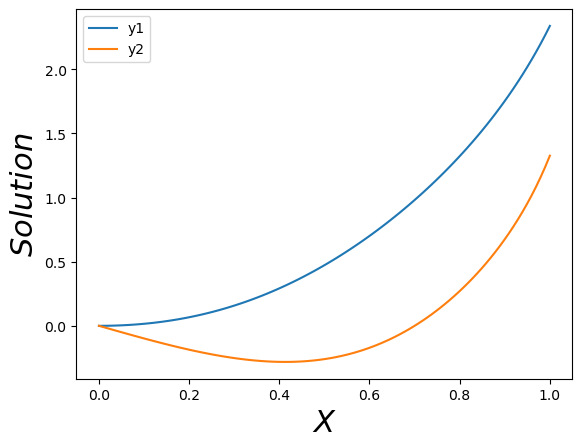

In [111]:
plt.plot(x,y1_sol,label="y1")
plt.plot(x,y2_sol,label="y2")
plt.xlabel("$X$",fontsize=22)
plt.ylabel("$Solution$",fontsize=22)
plt.legend(loc="upper left")

**Python does not have functions to directly solve second order ODEs**. 
* But **any second order ODE can be converted into two first order ODEs**.

Consider 

$$\ddot{x} = -\dot{x}^2 + \sin(x)$$

We can convert this into two first order ODEs as follows:

* Take $x$ (this is what we're trying to solve for). Then define $\dot{x}=v$ so that $v$ becomes a new variable.
* Note that $\dot{x}=v$ is one differential equation
* Since $\dot{v} = \ddot{x} = -\dot{x}^2 + \sin(x) = -v^2 + \sin(x)$ we get another differential equation

Our two equations:

$$\dot{x} = v$$
$$\dot{v} = -v^2 + \sin(x)$$

These are two coupled first order equations. They require an initial condition ($x_0$ and $v_0$)

In [128]:
def dSdx(x,S):
    x,v=S
    return [v,
            -v**2+np.sin(x)] 
x_0=0
v_0=5
s_0=[x_0,v_0]

In [137]:
t=np.linspace(0,1,100)
sol=odeint(dSdx,y0=s_0,t=t,tfirst=True)

In [143]:
x_sol=sol.T[0]
v_sol=sol.T[1]

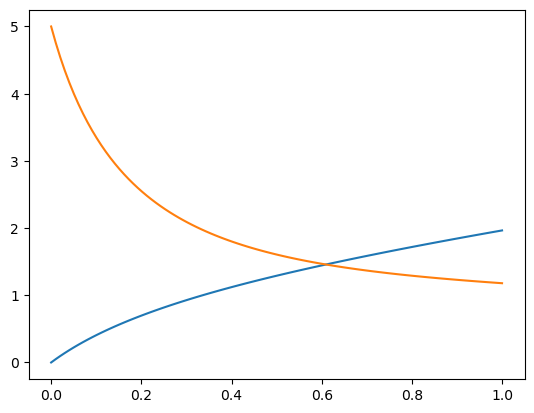

In [144]:
plt.plot(t,x_sol)
plt.plot(t,v_sol)

**Example:** Two coupled third order equations

$$\dddot{x_2}= -\ddot{x_1}^3 + \dot{x_2} + x_1 + \sin(t)$$
$$\dddot{x_1}= -2\dot{x_2}^2 + x_2$$
Define 
* $v_1 = \dot{x_1}$
* $v_2 = \dot{x_2}$
* $a_1 = \ddot{x_1} = \dot{v_1}$
* $a_2 = \ddot{x_2} = \dot{v_2}$

These make up four differential equations. Then noting that $\dot{a_1} = \dddot{x_1}$ and $\dot{a_2} = \dddot{x_2}$ we get

* $\dot{a_2} = -a_1^3 + v_2 + x_1 + \sin(t)$
* $\dot{a_1} = -2v_2^2 + x_2$

Then

$$\vec{S} = \begin{bmatrix} x_1\\ v_1 \\ a_1 \\ x_2 \\ v_2 \\ a_2 \end{bmatrix} \hspace{10mm} \implies \hspace{10mm} \frac{d\vec{S}}{dt} = \begin{bmatrix} \dot{x_1}\\ \dot{v_1} \\ \dot{a_1} \\ \dot{x_2} \\ \dot{v_2} \\ \dot{a_2} \end{bmatrix} =  \begin{bmatrix} v_1\\ a_1 \\ -2v_2^2 + x_2 \\ v_2 \\ a_2 \\ -a_1^3 + v_2 + x_1 + \sin(t) \end{bmatrix}$$

In [170]:
def dSdt(t,S):
    x1,v1,a1,x2,v2,a2=S
    return[v1,a1,-2*v2**2+x2,v2,a2,-a1**3+v2+x1+np.sin(t)]
x1_0=0
v1_0=0
a1_0=0
x2_0=0
v2_0=0
a2_0=0
S_0=[x1_0,v1_0,a1_0,x2_0,v2_0,a2_0]

In [171]:
t=np.linspace(0,1,100)
sol=odeint(dSdt,y0=S_0,t=t,tfirst=True)

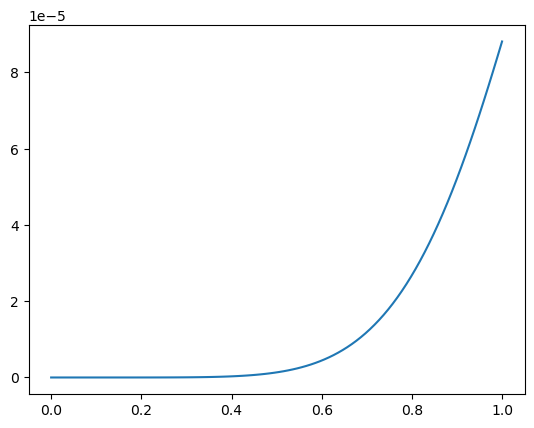

In [172]:
plt.plot(t,sol.T[0])

Not all solvers work for all ODEs. For example, the ODEs for 3 body motion 

* $dx_1/dt = v_{x1}$
* $dy_1/dt = v_{y1}$
* $dx_2/dt = v_{x2}$
* $dy_2/dt = v_{y2}$
* $dx_3/dt = v_{x3}$
* $dy_3/dt = v_{y3}$
* $dv_{x1}/dt = \frac{x_2-x_1}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{x_3-x_1}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{y1}/dt = \frac{y_2-y_1}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{y_3-y_1}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{x2}/dt = \frac{x_1-x_2}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{x_3-x_2}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{y2}/dt = \frac{y_1-y_2}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{y_3-x_2}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{x3}/dt = \frac{x_1-x_3}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{x_2-x_3}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{y3}/dt = \frac{y_1-y_3}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{y_2-y_3}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$

Require the DOP853 solver with low values for `rtol` and `atol`  to solve

* https://arxiv.org/pdf/1709.04775.pdf

Always review the literature on your specific ODE to find an appropriate solver. In addition, play around with the parameters `rtol` and `atol` to ensure you get a proper solution

In [179]:
def dSdt(t, S):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = S
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r13 = np.sqrt((x3-x1)**2 + (y3-y1)**2)
    r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
    return [ vx1,
            vy1,
            vx2,
            vy2,
            vx3,
            vy3,
            1/r12**3 * (x2-x1) + 1/r13**3 * (x3-x1), #mass 1
            1/r12**3 * (y2-y1) + 1/r13**3 * (y3-y1),
            1/r12**3 * (x1-x2) + 1/r23**3 * (x3-x2), #mass 2
            1/r12**3 * (y1-y2) + 1/r23**3 * (y3-y2),
            1/r13**3 * (x1-x3) + 1/r23**3 * (x2-x3), #mass 3
            1/r13**3 * (y1-y3) + 1/r23**3 * (y2-y3)
           ]

In [180]:
v1 =  0.39295
v2 = 0.09758

x1_0 = -1
y1_0 = 0
x2_0 = 1
y2_0 = 0
x3_0 = 0
y3_0 = 0
vx1_0 =  v1
vy1_0 =  v2
vx2_0 = v1
vy2_0 = v2
vx3_0 = -2*v1
vy3_0 = -2*v2

In [184]:
t = np.linspace(0, 40, 1000)
sol = solve_ivp(dSdt, (0,40), y0=[x1_0, y1_0, x2_0, y2_0, x3_0, y3_0,
                       vx1_0, vy1_0, vx2_0, vy2_0, vx3_0, vy3_0],
                method="DOP853",t_eval=t,rtol=1e-10,atol=1e-13)

In [185]:
t = sol.t
x1 = sol.y[0]
y1 = sol.y[1]
x2 = sol.y[2]
y2 = sol.y[3]
x3 = sol.y[4]
y3 = sol.y[5]

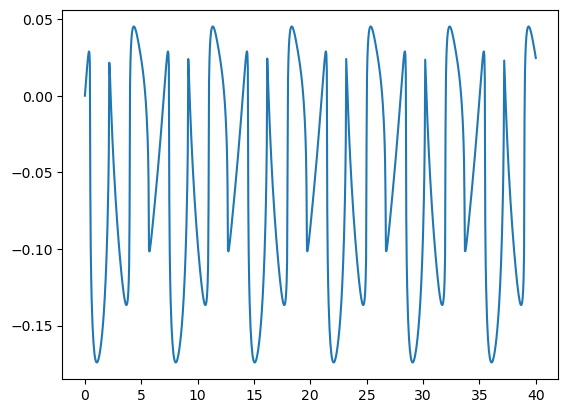

In [187]:
plt.plot(t, y1)# Bu örnekte eğer methodu ve rtol ve atolu koymazsan sonuc düşünelinenden değişik çıkıyor.
#bunların amacı hata payını minimize ederek kaotik olan durumları düzeltmek.